# House Prices With Advanced Feature Engineering


In [46]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

# Overview

In [47]:
# Data set documentation
house_data_description = open('./data/data_description.txt')
text = house_data_description.read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [48]:
#a brief look at the dataset
houses_train = pd.read_csv('./data/train.csv')
houses_test = pd.read_csv('./data/test.csv')
print(houses_train.shape)
houses_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
houses_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
#splitting features to categorical and numerical
categorical = houses_train.dtypes[(houses_train.dtypes==object)].index
numerical = houses_train.dtypes[(houses_train.dtypes!=object)].index[1:-1] #omitting id and SalePrice (first and last dtypes respectively)

print(f"Numerical features: {numerical.size}")
print(f"Categorical features: {categorical.size}")

Numerical features: 36
Categorical features: 43


# SalePrice statistic

First, we would like to understand the distribution describing the target variable. We aim to work with normaly distributed variables (target and features) because then, methods that are non-invariant to standartization such as LASSO or ridge regression should work more properly.
Also, for sake of interpertability, validity of measures of association (such as correlations), and insensitivity to the features scales, the different variables should be normalized.  

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


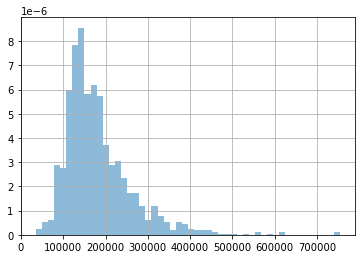

In [51]:
print(houses_train['SalePrice'].describe())
print(f"Skewness: {houses_train['SalePrice'].skew()}")
print(f"Kurtosis: {houses_train['SalePrice'].kurt()}")
houses_train['SalePrice'].hist(bins=50, density=True, alpha=0.5);

Lets try the normal and log-normal for the target:

C:\Users\shosh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shosh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness_norm: 0.07629631953273104
Kurtosis_norm: -0.12601603701678066
Skewness_Log norm: 0.1212103673013655
Kurtosis_Log norm: 0.8026555069117713


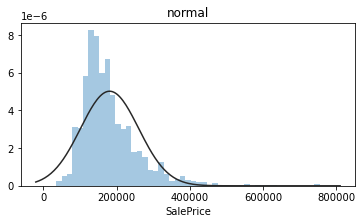

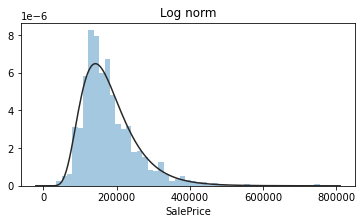

In [52]:
mu = np.mean(houses_train['SalePrice'])
sigma = np.std(houses_train['SalePrice'])
norm = np.random.normal(mu, sigma, houses_train['SalePrice'].shape)

plt.figure(figsize=(6, 3))
sns.distplot(houses_train['SalePrice'],kde=False,fit=scipy.stats.norm)
plt.title("normal")
print("Skewness_norm:", scipy.stats.skew(norm))
print("Kurtosis_norm:", scipy.stats.kurtosis(norm))


log_sp = np.log(houses_train['SalePrice'])
plt.figure(figsize=(6, 3),)
sns.distplot(houses_train['SalePrice'], kde=False, fit=scipy.stats.lognorm)
plt.title("Log norm")
print("Skewness_Log norm:", scipy.stats.skew(log_sp))
print("Kurtosis_Log norm:", scipy.stats.kurtosis(log_sp))

In [53]:
houses_train["SalePrice_log"] = log_sp

Seems more like a log normal distribution


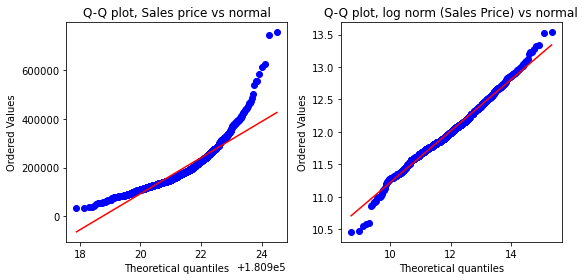

In [54]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
scipy.stats.probplot(houses_train['SalePrice'], dist=scipy.stats.norm, sparams=(houses_train['SalePrice'].mean()), plot=plt)
plt.title('Q-Q plot, Sales price vs normal')
plt.subplot(1,2,2)
scipy.stats.probplot(log_sp, dist=scipy.stats.norm, sparams=(log_sp.mean()), plot=plt,)
plt.title('Q-Q plot, log norm (Sales Price) vs normal');
plt.tight_layout()

# Features

Now lets move on to examine the features. First. how many NAs do we have?

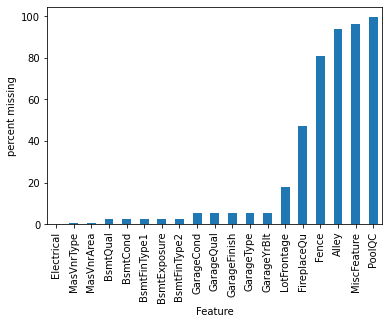

In [55]:
#for train
missing_train = houses_train.isnull().sum()*100/len(houses_train)
missing_train = missing_train[missing_train > 0]
missing_train.sort_values(inplace=True)
missing_train.plot.bar()
plt.xlabel("Feature")
plt.ylabel("percent missing")
plt.show();
#for test
missing_test = houses_test.isnull().sum()*100/len(houses_train)
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(inplace=True)

In [56]:
missing = set(missing_train.index).union(set(missing_test.index))

Some features have large portions of NAs, But these are not actually missing values as they reprecent the absence of a house characraristic such as not having a pool (PoolQC, Alley etc.). However the MiscFeature which describe the present of some special charactaristics (such as 2nd garage, elevator etc.) could be discarded entirely as those few special features are not comparable...  


For numerical data we can later fill in the missing values with columns averages. For categorical, we can change to `None`

We should note that, when filling in the missing values with averages, we are not affecting the average, but are affecting the general distribution, and that should be taken into consideration.

In [57]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fill_with_none = [col for col in missing if col in categorical]
cols_fill_with_average = [col for col in missing if col in numerical]
# replace 'NaN' with 'None' in these columns
for col in cols_fill_with_none:
    houses_train[col].fillna("None",inplace=True)
    houses_test[col].fillna("None",inplace=True)
    
for col in cols_fill_with_average:
    houses_train[col].fillna(houses_train[col].mean(),inplace=True)
    houses_test[col].fillna(houses_test[col].mean(),inplace=True)

# Correlations

First, we will examine the correlation between the independent variables and the dependent variable (our target) and among themselves. we will test quantitative features first.

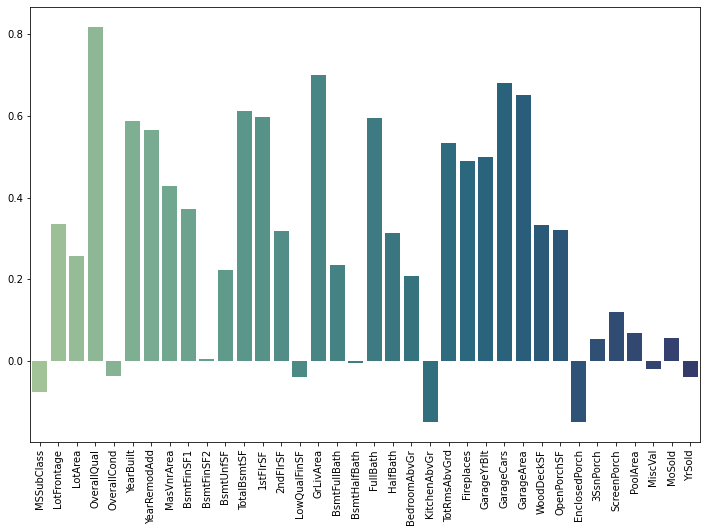

In [58]:
cols = list(numerical.values) + ["SalePrice_log"]

corrs = houses_train[cols].corr()["SalePrice_log"]
fig, ax = plt.subplots(figsize=(12, 8))
g = sns.barplot(
    x=corrs[:-1].index,
    y=corrs[:-1].values, palette="crest")
plt.xticks(rotation=90)
plt.show();

Looking at the correlations between SalePrice and numerical features, we can see that setting a threshold of absolute value of $|R|=0.4$ will maintain about half of the features. 

<ipython-input-59-d08145719c69>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlations, dtype=np.bool)


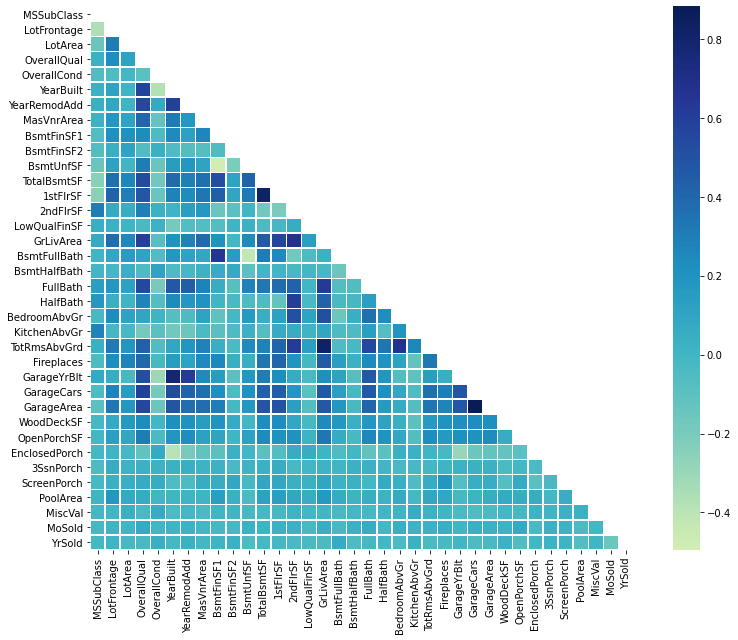

In [59]:
correlations = houses_train[numerical].corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlations, mask=mask, center=0,
            square=True, linewidths=.5,cmap="YlGnBu")        
plt.show()

We can see that some features are highly correlated. We shall consider remove some of features in training to avoid multicolinearity

As mentioned above, we shall also try to work with normaly distributed features

In [60]:
normal_data = pd.concat([pd.Series(houses_train[numerical].kurt(),name="Kurtosis"),pd.Series(houses_train[numerical].skew(),name="Skewness")],axis=1)
normal_data

,Kurtosis,Skewness
MSSubClass,1.580188,1.407657
LotFrontage,21.848165,2.384950
LotArea,203.243271,12.207688
OverallQual,0.096293,0.216944
OverallCond,1.106413,0.693067
YearBuilt,-0.439552,-0.613461
YearRemodAdd,-1.272245,-0.503562
MasVnrArea,10.154316,2.676412
BsmtFinSF1,11.118236,1.685503
BsmtFinSF2,20.113338,4.255261


By examining the kurtosis and skewness, we can find variables which their original distribution is far from normal. We would hope to normalize those. Lets try the lognormal (and specificaly focus on variables that are right now far from being normal such as LotArea, 3SsnPorch, PoolArea etc.).

In [61]:
log_house_train = np.log(houses_train[numerical]+0.001)
log_normal_data = pd.concat([pd.Series(log_house_train[numerical].kurt(),name="Kurtosis"),pd.Series(log_house_train[numerical].skew(),name="Skewness")],axis=1)
log_normal_data

,Kurtosis,Skewness
MSSubClass,-1.117556,0.232528
LotFrontage,3.558666,-0.930756
LotArea,4.713359,-0.137993
OverallQual,4.289408,-0.929222
OverallCond,5.601154,-0.636130
YearBuilt,-0.377874,-0.641144
YearRemodAdd,-1.263360,-0.511009
MasVnrArea,-1.819653,0.390206
BsmtFinSF1,-1.417881,-0.731329
BsmtFinSF2,4.037851,2.447346


Now Lets find that features for which taking log indeed improve

In [62]:
diff = abs(normal_data)-abs(log_normal_data)
diff[(diff.Kurtosis>1) & (diff.Skewness>0)]

,Kurtosis,Skewness
LotFrontage,18.289500,1.454195
LotArea,198.529912,12.069695
MasVnrArea,8.334663,2.286206
BsmtFinSF1,9.700355,0.954175
BsmtFinSF2,16.075487,1.807915
1stFlrSF,5.595034,1.297599
LowQualFinSF,31.208101,1.676994
GrLivArea,4.612519,1.359566
BsmtHalfBath,3.464738,0.242253
WoodDeckSF,1.017065,1.442827


Now lets keep the log of these features (and also keep in mind that some may not be relevant at all. e.g. MiscVal)

In [63]:
features_to_log = diff[(diff.Kurtosis>1) & (diff.Skewness>0)].index
for feature in features_to_log:
    houses_train[feature+"_log"]=np.log(houses_train[feature]+0.0001) # adding a small constant to avoid numerical instability
    houses_test[feature+"_log"]=np.log(houses_test[feature]+0.0001) # adding a small constant to avoid numerical instability

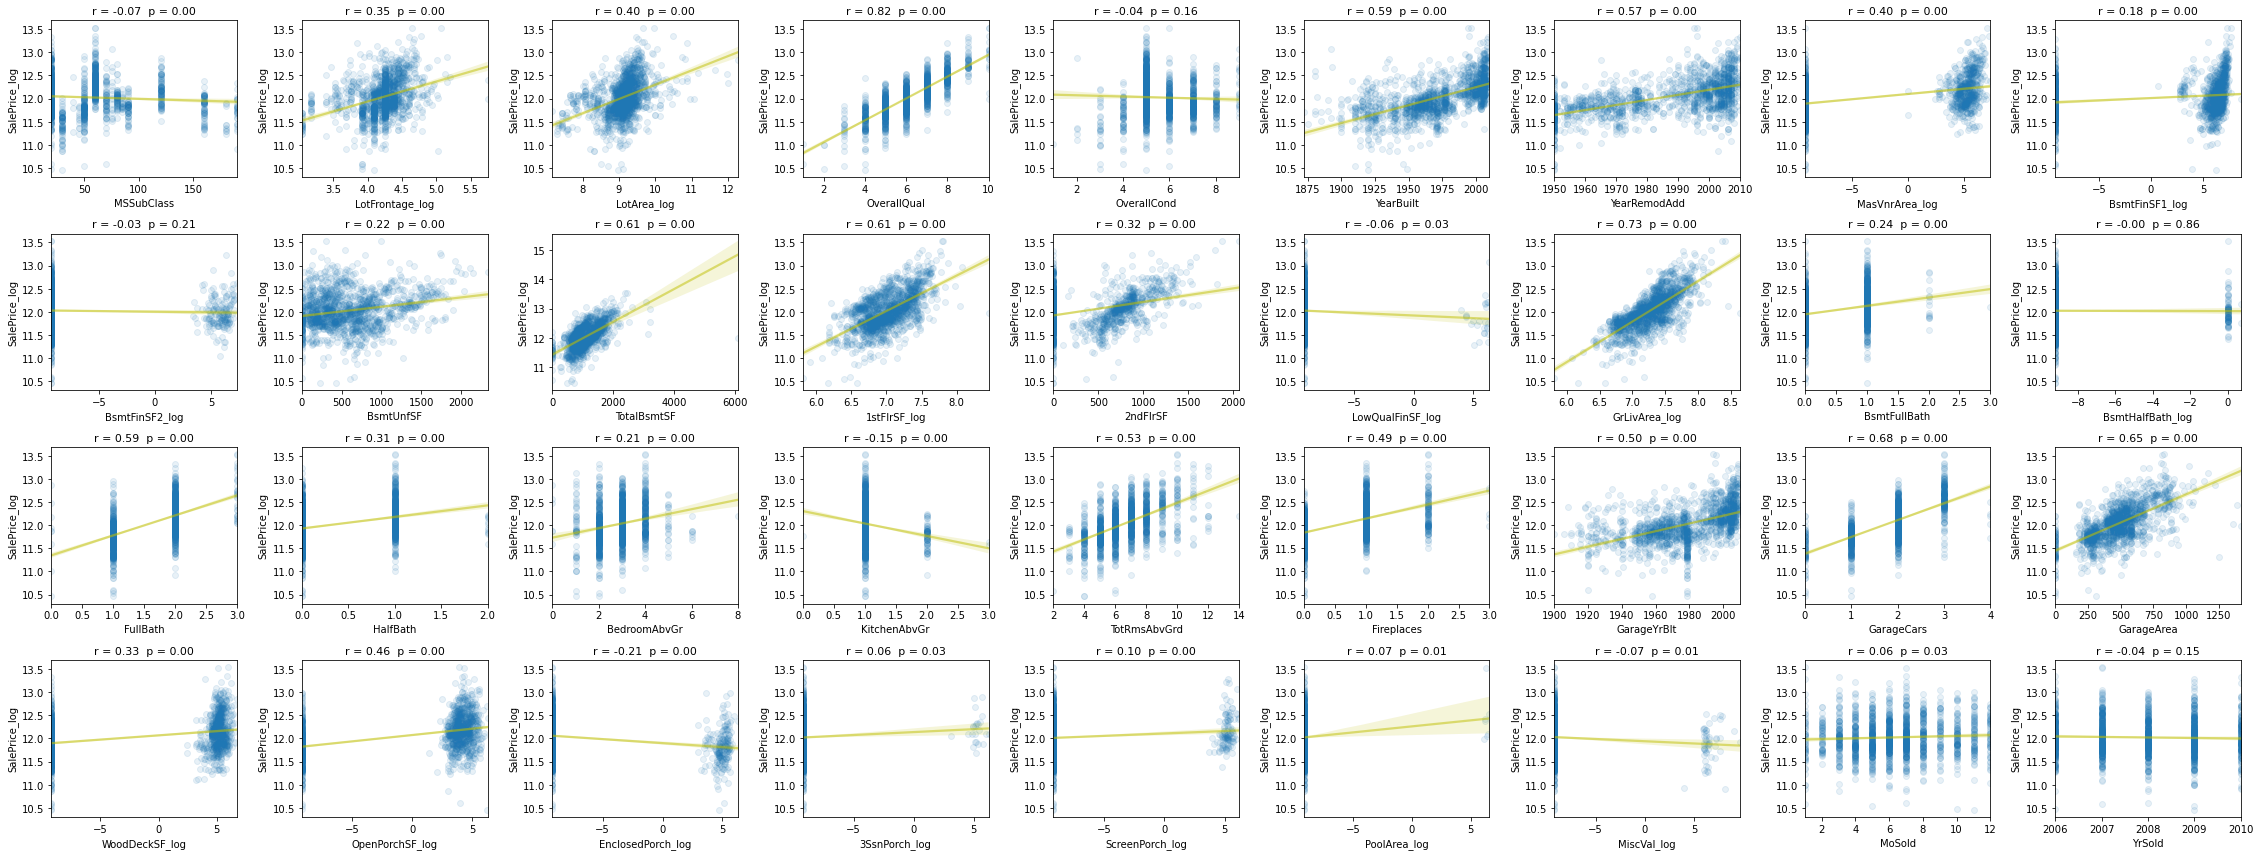

In [64]:
n_rows = 4
n_cols = 9

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3))
li_num_feats = list(numerical)

for r in range(0, n_rows):
    for c in range(0, n_cols):  
        i = r * n_cols + c
        if i < len(li_num_feats):
            
            feature_to_plot = li_num_feats[i]
            if feature_to_plot+"_log" in houses_train.columns:
                
                feature_to_plot = feature_to_plot+"_log"
            sns.regplot(x=houses_train[feature_to_plot], y=houses_train["SalePrice_log"], ax = axs[r][c],  scatter_kws={"alpha": 0.1}, line_kws={"color": "y", "alpha": 0.5}
)
            stp = scipy.stats.pearsonr(houses_train[feature_to_plot], houses_train["SalePrice_log"])
            
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "  " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 


These above plots help a lot when determining the dependancy of the target variable in the different quantitative features.
We can look at the estimated slopes of the different fits. fits with small slopes values correspond to features in which the target variable is somewhant independant (e.g. MoSold, YrSold etc.). However, some features are clearly correlated with the target variable and may contribute later on when we try to build our LR model (e.g OverallQual, TotRmsAbvGrd). 


Now Lets explore our categorical fearues..
We can boxplot the target variable for each group in each categorical feature

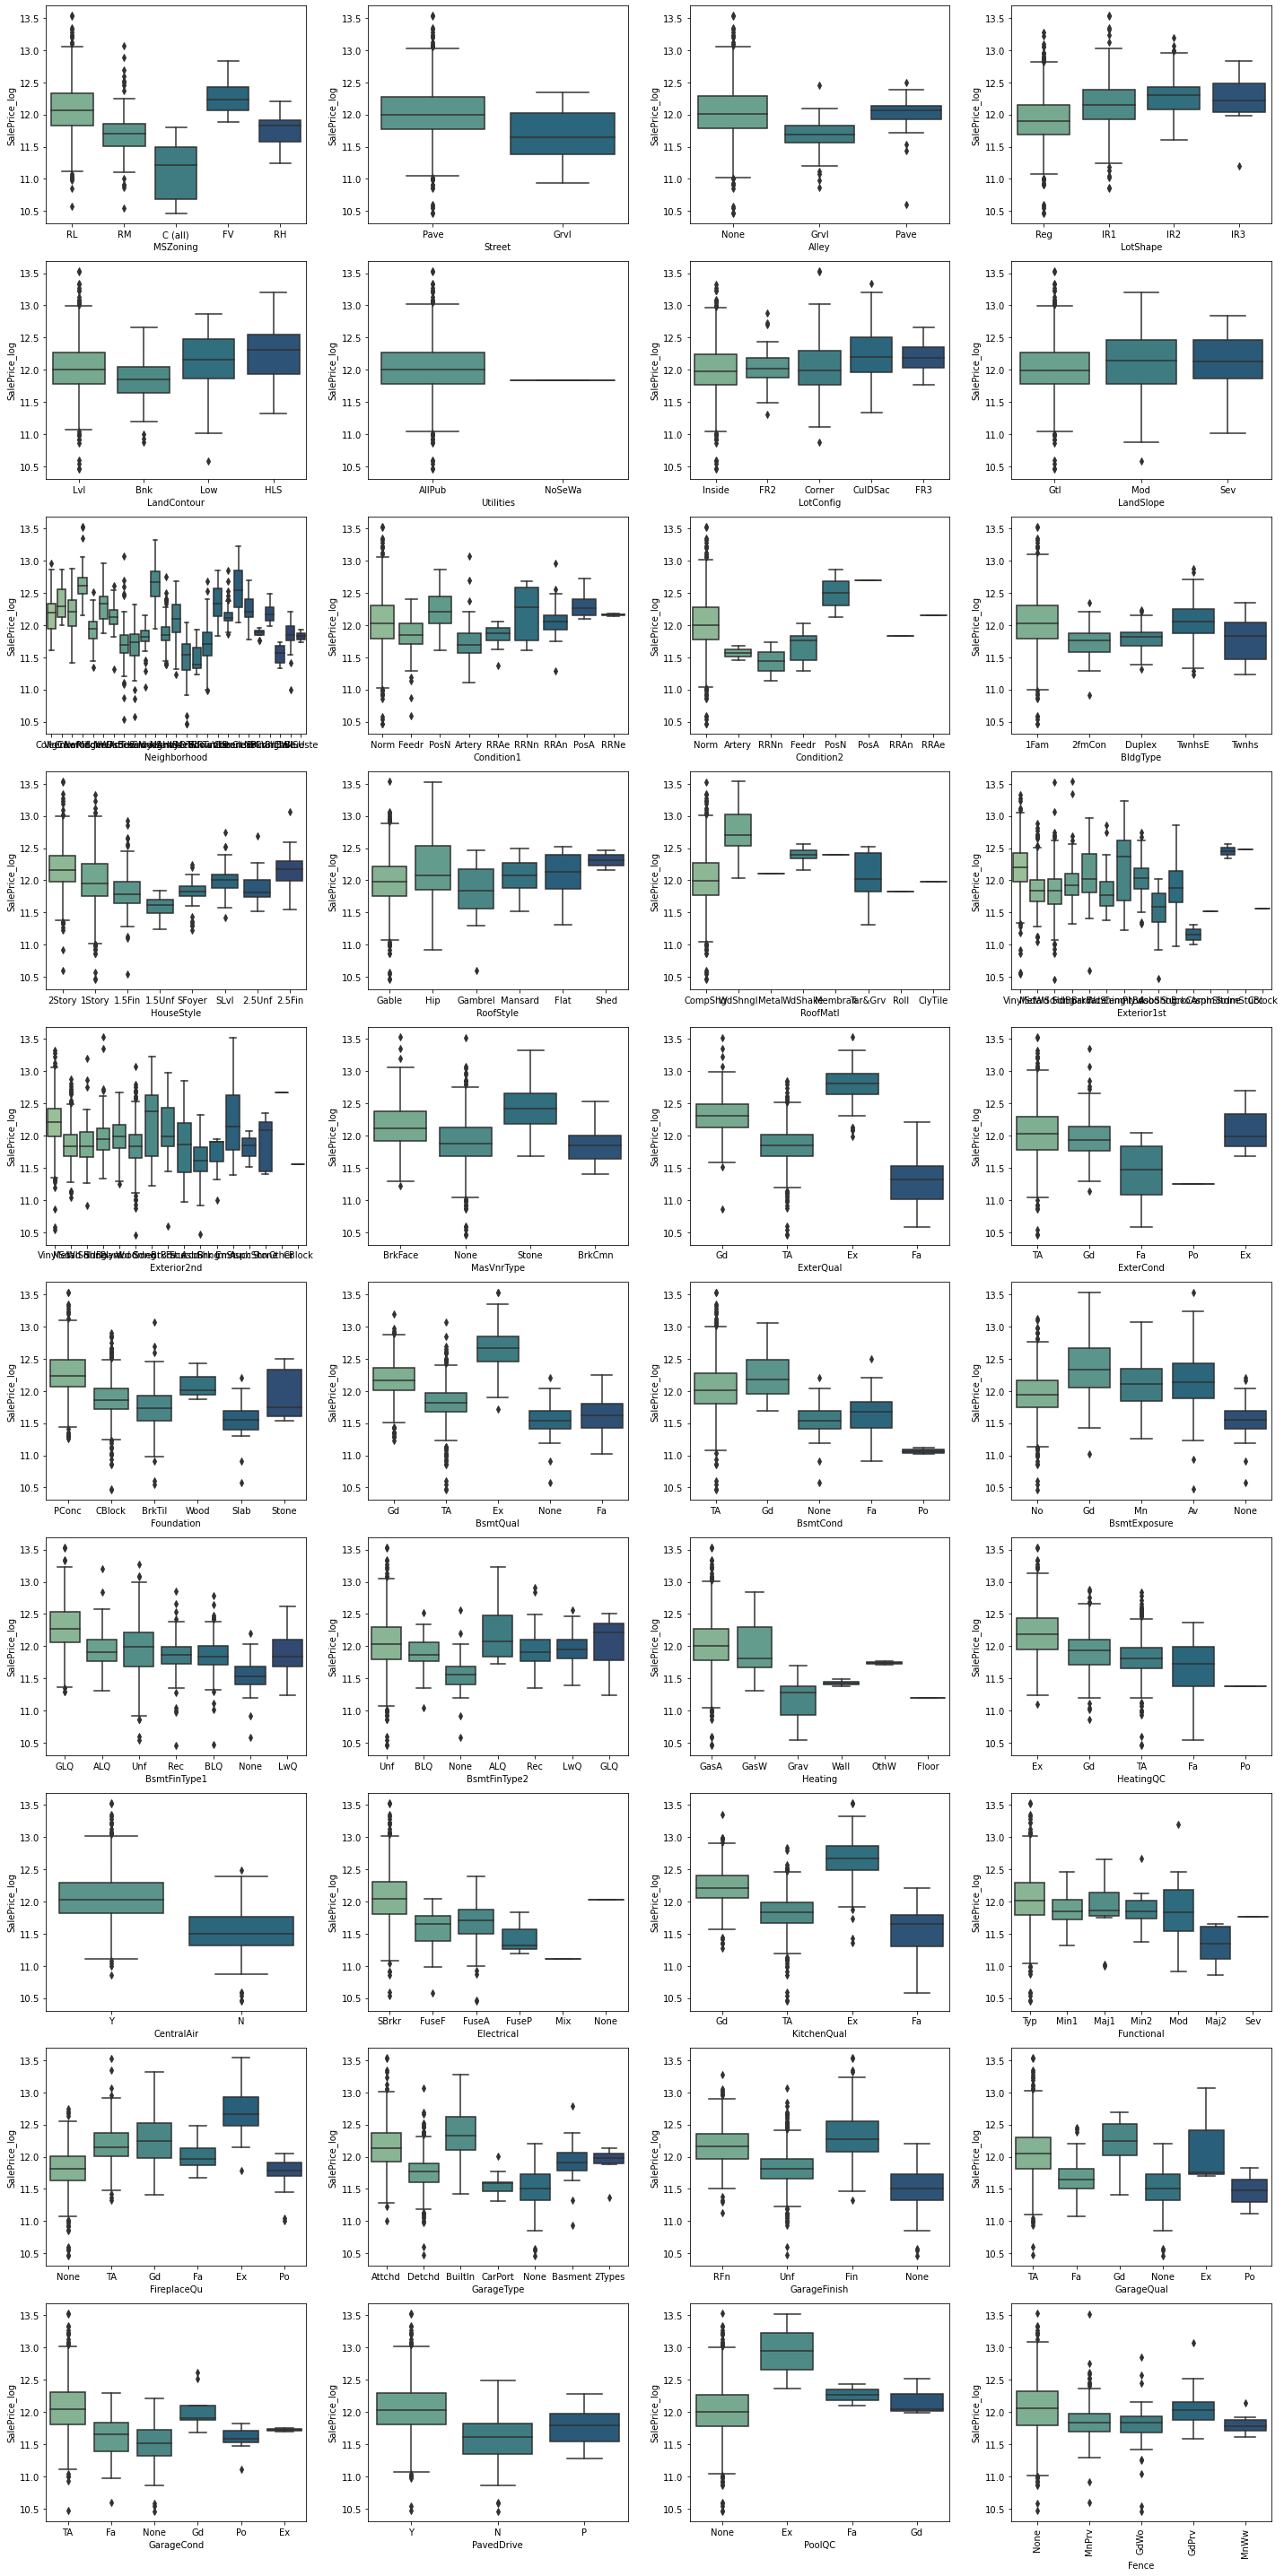

In [65]:
li_cat_feats = list(categorical)
nr_rows = 10
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(data=houses_train, x=li_cat_feats[i], y="SalePrice_log", ax = axs[r][c], palette="crest")
            plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()   

One can see that for some features the target variable distributions in different groups differ from each other quit a lot. Those will be good candidates for our model as the capture some of the variance in the target variable

Lets also print 2 box plots of critical numerical features

# Part 2

In [66]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats import diagnostic 

In [67]:
import sklearn
from sklearn import preprocessing
from scipy import stats

tranform categorical features into dummy variables:

In [68]:
# data = []
# for col in categorical_fact:
#     s,p =stats.kruskal(*[houses_train[houses_train[col]==x]["SalePrice"].values for x in houses_train[col].unique()])
#     data.append((col,p))

# kurskal_df = pd.DataFrame(data = data, columns = ["feature","pval"])
# kurskal_df.sort_values(by = 'pval')

In [69]:
# corr_threshold = 0.55
# corrs_ =corrs.copy()
# corrs_ = corrs_[(abs(corrs_)>corr_threshold) & (corrs_.index != 'SalePrice_log')]

# Begin modelling

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [71]:

# factorizing categorical variables wrt rank category target mean 
for col in houses_train[categorical]:
    grouped_target = houses_train.groupby(col)["SalePrice"].mean().sort_values(ascending=True)
    factors = pd.factorize(grouped_target.index)[0]
    grouped_target = grouped_target.reset_index()
    grouped_target.drop("SalePrice",axis=1,inplace=True)
    grouped_target[col+"_fact"] = factors 
    houses_train = pd.merge(left = houses_train, right=grouped_target, on=col, how="left")
    houses_test = pd.merge(left = houses_test, right=grouped_target, on=col, how="left")
categorical_fact = list(categorical+'_fact')

#fill na in test due to categories that abcsent from train
houses_test[categorical_fact] = houses_test[categorical_fact].fillna(value=-1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_fact,GarageFinish_fact,GarageQual_fact,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,5,1,3,5,2,0,2,3,4.0,4
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,5,1,3,5,2,0,4,2,4.0,4
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,5,3,3,5,2,0,2,3,4.0,4
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,5,3,3,5,2,0,4,3,4.0,4
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,5,2,3,5,2,0,4,3,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,1,0,2,0,4,3,4.0,4
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,1,1,3,5,2,0,4,3,4.0,1
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,2,1,3,5,2,0,4,3,4.0,1
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,1,0,2,0,2,1,4.0,4


In [82]:

X_train, X_test, y_train, y_test = train_test_split(houses_train[list(numerical)+list(categorical_fact)], 
                                                    houses_train["SalePrice"].values, 
                                                    test_size=0.33, random_state=42)

rf_clf = RandomForestRegressor(oob_score=True)
rf_clf.fit(X_train,y_train)
prediction = rf_clf.predict(X_test)

C:\Users\shosh\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:>

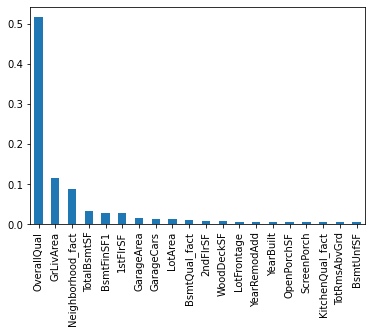

In [83]:
feature_importances = pd.Series(data=rf_clf.feature_importances_, index=houses_test[list(numerical)+list(categorical_fact)].columns)
feature_importances.sort_values(ascending = False).head(20).plot.bar()

In [84]:
# houses_test["SalePrice"]
rf_clf.oob_score_

0.8501577611294439

In [85]:
rf_clf.score(X_test,y_test)

0.8726888509029161